# IMDB REVIEW SENTIMENT CLASSIFICATION
**In this notebbok, we use the imdb data to classify customer review as Positive or Negative**

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB

**Importing the data**

In [4]:
df = pd.read_csv('IMDB Dataset.csv')
print(df.shape)
df.head()

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,negative
freq,5,25000


In [6]:
df.groupby('sentiment').describe()

review                                                            \
           count unique                                                top   
sentiment                                                                    
negative   25000  24698  I see that C. Thomas Howell has appeared in ma...   
positive   25000  24884  Loved today's show!!! It was a variety and not...   

                
          freq  
sentiment       
negative     3  
positive     5

In [7]:
df['length'] = df['review'].apply(len)
df.head(3)

,review,sentiment,length
0,One of the other reviewers has mentioned that ...,positive,1761
1,A wonderful little production. <br /><br />The...,positive,998
2,I thought this was a wonderful way to spend ti...,positive,926


**1.Data visualization**

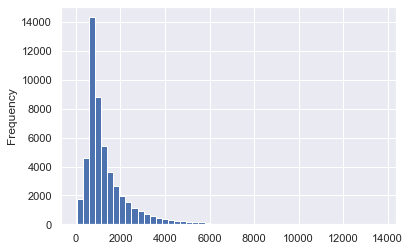

In [12]:
df['length'].plot(bins=50, kind='hist') 

In [9]:
#
df.length.describe()

count    50000.000000
mean      1309.431020
std        989.728014
min         32.000000
25%        699.000000
50%        970.000000
75%       1590.250000
max      13704.000000
Name: length, dtype: float64

In [13]:
#The longuest review has 13704 character, let's find this message 
df[df['length'] == 13704]['review'].iloc[0]

'Match 1: Tag Team Table Match Bubba Ray and Spike Dudley vs Eddie Guerrero and Chris Benoit Bubba Ray and Spike Dudley started things off with a Tag Team Table Match against Eddie Guerrero and Chris Benoit. According to the rules of the match, both opponents have to go through tables in order to get the win. Benoit and Guerrero heated up early on by taking turns hammering first Spike and then Bubba Ray. A German suplex by Benoit to Bubba took the wind out of the Dudley brother. Spike tried to help his brother, but the referee restrained him while Benoit and Guerrero ganged up on him in the corner. With Benoit stomping away on Bubba, Guerrero set up a table outside. Spike dashed into the ring and somersaulted over the top rope onto Guerrero on the outside! After recovering and taking care of Spike, Guerrero slipped a table into the ring and helped the Wolverine set it up. The tandem then set up for a double superplex from the middle rope which would have put Bubba through the table, bu

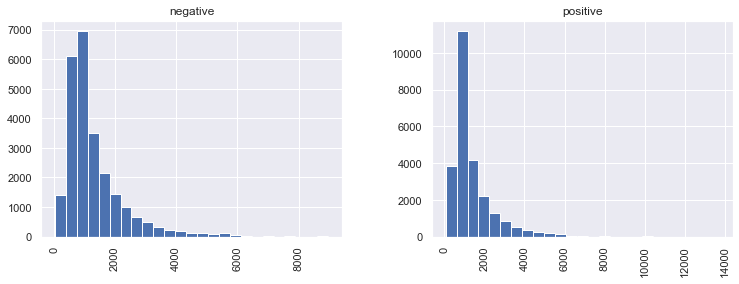

In [17]:
#Based on basic EDA we've been able to discover a trend that negative reviews tend to have more characters
df.hist(column='length', by='sentiment', bins=25,figsize=(12,4));

**2.Features Engineering**

-In this section we will convert the raw messages (sequence of characters)

-into vectors (sequences of numbers) using bagofwords method

-As a first step, let's write a function that will split a message into its individual words and return a list. We'll also
remove very common words, ('the', 'a', etc..). To do this we will take advantage of the NLTK library. It's pretty much the standard library in Python for processing text and has a lot of useful features.

-We'll only use some of the basic ones here.

-Let's create a function that will process the string in the message column, then we can just use apply() in pandas do process all the text in the DataFrame.

-First removing punctuation. We can just take advantage of Python's built-in string library to get a quick list of all the possible punctuation.

In [19]:
import nltk 
import string
#Remove punctuation example
message= 'Sample message! Notice: It has punctuation.'

# punctuation have been removed and replaced by blank space
nopunctuation= [c for c in message if c not in string.punctuation]

# Remove English Stopwords(Very common words as if, not...)
from nltk.corpus import stopwords

# To join elements in a list togeteher
nopunctuation =''.join(nopunctuation)

#Remove Stopwords from our list nopunct
nopunctuation.split()

clean_message=[word for word in nopunctuation.split() if word.lower() not in stopwords.words('english')]

In [20]:
def text_process(message):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunctuation = [char for char in message if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunctuation = ''.join(nopunctuation)
    
    # Now just remove any stopwords
    return [word for word in nopunctuation.split() if word.lower() not in stopwords.words('english')]

In [21]:
df.head()

,review,sentiment,length
0,One of the other reviewers has mentioned that ...,positive,1761
1,A wonderful little production. <br /><br />The...,positive,998
2,I thought this was a wonderful way to spend ti...,positive,926
3,Basically there's a family where a little boy ...,negative,748
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317


In [22]:
#Example
#tokenised version (clean version of review) converting a normal text string into a list of token  
df['review'].head(5).apply(text_process)

0    [One, reviewers, mentioned, watching, 1, Oz, e...
1    [wonderful, little, production, br, br, filmin...
2    [thought, wonderful, way, spend, time, hot, su...
3    [Basically, theres, family, little, boy, Jake,...
4    [Petter, Matteis, Love, Time, Money, visually,...
Name: review, dtype: object

**3. Vectorization**

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

bow_transformer= CountVectorizer(analyzer=text_process).fit(df['review'])

# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

213993


In [24]:
#Example review 10
review10=df['review'][9]
review10

'If you like original gut wrenching laughter you will like this movie. If you are young or old then you will love this movie, hell even my mom liked it.<br /><br />Great Camp!!!'

In [25]:
#Equivalent of review 10 in Bag Of Words
bow_review10 = bow_transformer.transform([review10])
print(bow_review10)
print(bow_review10.shape)

  (0, 17202)	1
  (0, 36934)	1
  (0, 105517)	1
  (0, 127361)	1
  (0, 138794)	1
  (0, 140876)	1
  (0, 148191)	1
  (0, 151146)	1
  (0, 152409)	2
  (0, 152440)	1
  (0, 153744)	1
  (0, 158822)	1
  (0, 159850)	2
  (0, 165501)	1
  (0, 166634)	1
  (0, 212245)	1
  (0, 213111)	1
(1, 213993)


In [28]:
#to get the word that appear twice in message 10
print(bow_transformer.get_feature_names()[152409])
print(bow_transformer.get_feature_names()[159850])

like
movie


In [29]:
#Now we can use .transform on our Bag-of-Words (bow) transformed object and transform the entire DataFrame of messages. 
#Let's go ahead and check out how the bag-of-words counts for the entire SMS corpus is a large, sparse matrix:
reviews_bow = bow_transformer.transform(df['review'])

print('Shape of Sparse Matrix: ', reviews_bow.shape)
print('Amount of Non-Zero occurences: ', reviews_bow.nnz)

Shape of Sparse Matrix:  (50000, 213993)
Amount of Non-Zero occurences:  5102037


In [32]:
sparsity = (100.0 * reviews_bow.nnz / (reviews_bow.shape[0] * reviews_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


**4. TF & IDF**

Consider a document containing 100 words wherein the word cat appears 3 times.

The term frequency (i.e., tf) for cat is then (3 / 100) = 0.03. Now, assume we have 10 million documents and the word cat appears in one thousand of these. Then, the inverse document frequency (i.e., idf) is calculated as log(10,000,000 / 1,000) = 4. Thus, the Tf-idf weight is the product of these quantities: 0.03 * 4 = 0.12.

In [33]:
#TF: Term Frequency
#IDF: Inverse Document Frequency
#Tf-idf = TF*IDF

from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(reviews_bow)
tfidf10 = tfidf_transformer.transform(bow_review10)
print(tfidf10)

  (0, 213111)	0.1711534121358802
  (0, 212245)	0.39136061806683325
  (0, 166634)	0.17792273684314952
  (0, 165501)	0.16170382857942633
  (0, 159850)	0.1566062632729995
  (0, 158822)	0.29748271041503666
  (0, 153744)	0.1446940918290929
  (0, 152440)	0.2053015150989673
  (0, 152409)	0.18692094646229784
  (0, 151146)	0.30089575556429893
  (0, 148191)	0.22012869816983704
  (0, 140876)	0.23063455326045113
  (0, 138794)	0.3792680583738993
  (0, 127361)	0.11344526169914056
  (0, 105517)	0.07918776607074171
  (0, 36934)	0.2522191904379386
  (0, 17202)	0.36042506015744846


We'll go ahead and check what is the IDF (inverse document frequency) of the word `"team"` and of word `"movie"`?

In [34]:
#
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['team']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['movie']])

4.792483770170509
1.5206602969543848


To transform the entire bag-of-words corpus into TF-IDF corpus at once:

In [35]:
#
reviews_tfidf = tfidf_transformer.transform(reviews_bow)
print(reviews_tfidf.shape)

(50000, 213993)


**5. Training the Model**

In [38]:
from sklearn.naive_bayes import MultinomialNB
imdb_sentiment = MultinomialNB().fit(reviews_tfidf, df['sentiment'])

In [39]:
print('predicted:', imdb_sentiment.predict(tfidf10)[0])
print('expected:', df.sentiment[9])

predicted: positive
expected: positive


**6. Model Evaluation**

In [40]:
#Prediction on the entire data set
all_predictions = imdb_sentiment.predict(reviews_tfidf)
print(all_predictions)

['positive' 'positive' 'positive' ... 'negative' 'negative' 'negative']


In [42]:
from sklearn.metrics import classification_report
print (classification_report(df['sentiment'], all_predictions))

              precision    recall  f1-score   support

    negative       0.91      0.93      0.92     25000
    positive       0.93      0.91      0.92     25000

    accuracy                           0.92     50000
   macro avg       0.92      0.92      0.92     50000
weighted avg       0.92      0.92      0.92     50000



**7.TRAIN TEST SPLIT METHOD**

In [44]:
from sklearn.model_selection import train_test_split

review_train, review_test, sentiment_train, sentiment_test = \
train_test_split(df['review'], df['sentiment'], test_size=0.2)

print(len(review_train), len(review_test), len(review_train) + len(review_test))

40000 10000 50000


In [45]:
#We create a Pipeline
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [46]:
pipeline.fit(review_train,sentiment_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000023FAFBF5048>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [47]:
predictions = pipeline.predict(review_test)

In [48]:
print(classification_report(predictions,sentiment_test))

              precision    recall  f1-score   support

    negative       0.88      0.86      0.87      5147
    positive       0.85      0.88      0.86      4853

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

